# Xception TL: Sex to Age

In [1]:
from brainprint.dl.load import read_dataset
from tensorflow import keras
from brainprint.dl.hyperxception import run_hyper_xception
from brainprint.dl.utils import VOLUME_SHAPE
from tensorflow_addons.metrics import RSquare

In [2]:
train, validation = read_dataset(target="age")

2023-01-26 22:05:50.474308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 22:05:50.934910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6789 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:26:00.0, compute capability: 6.1


## Sex

In [3]:
sex_model = keras.models.load_model("/home/zvi/Projects/lab/HyperXception/Sex/final")
sex_model.trainable = False

In [4]:
embedded_layer = sex_model.layers[-2].output
dropout = keras.layers.Dropout(rate=0.5)(embedded_layer)
prediction_layer = keras.layers.Dense(
    units=1, activation="linear", name="prediction_layer"
)(dropout)
new_model = keras.models.Model(inputs=sex_model.input, outputs=prediction_layer)

In [5]:
new_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-6),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError(), RSquare()],    
)

In [6]:
stop_early = keras.callbacks.EarlyStopping(
    patience=4,
    restore_best_weights=True,
)
callbacks = [stop_early]

In [7]:
history = new_model.fit(train, epochs=50, validation_data=validation, callbacks=callbacks)

Epoch 1/50


2023-01-26 22:06:04.385700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 362 of 1000
2023-01-26 22:06:14.364185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 734 of 1000
2023-01-26 22:06:21.732789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2023-01-26 22:06:22.370850: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


457/457 [==============================] - 134s 229ms/step - loss: 838.5575 - mean_absolute_error: 26.7413 - r_square: -6.2351 - val_loss: 551.3291 - val_mean_absolute_error: 21.2098 - val_r_square: -5.0677
Epoch 2/50


2023-01-26 22:08:17.487063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 392 of 1000
2023-01-26 22:08:27.470666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 760 of 1000
2023-01-26 22:08:34.343713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 118s 200ms/step - loss: 497.3577 - mean_absolute_error: 19.1597 - r_square: -3.2912 - val_loss: 312.6476 - val_mean_absolute_error: 14.1542 - val_r_square: -2.4409
Epoch 3/50


2023-01-26 22:10:16.212217: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 359 of 1000
2023-01-26 22:10:26.216813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 727 of 1000
2023-01-26 22:10:33.449408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 120s 203ms/step - loss: 311.7278 - mean_absolute_error: 13.3382 - r_square: -1.6896 - val_loss: 201.4573 - val_mean_absolute_error: 10.5912 - val_r_square: -1.2172
Epoch 4/50


2023-01-26 22:12:16.561704: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 349 of 1000
2023-01-26 22:12:26.567997: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 707 of 1000
2023-01-26 22:12:34.679114: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 121s 202ms/step - loss: 222.8687 - mean_absolute_error: 10.4081 - r_square: -0.9229 - val_loss: 160.2126 - val_mean_absolute_error: 9.6093 - val_r_square: -0.7632
Epoch 5/50


2023-01-26 22:14:17.692083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 22:14:27.668386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 723 of 1000
2023-01-26 22:14:35.423335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 119s 199ms/step - loss: 185.2834 - mean_absolute_error: 9.3610 - r_square: -0.5986 - val_loss: 149.6887 - val_mean_absolute_error: 9.4436 - val_r_square: -0.6474
Epoch 6/50


2023-01-26 22:16:16.604823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 366 of 1000
2023-01-26 22:16:26.612209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 728 of 1000
2023-01-26 22:16:34.199383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 118s 199ms/step - loss: 169.9455 - mean_absolute_error: 8.9968 - r_square: -0.4663 - val_loss: 148.5826 - val_mean_absolute_error: 9.5113 - val_r_square: -0.6353
Epoch 7/50


2023-01-26 22:18:15.166617: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 384 of 1000
2023-01-26 22:18:25.179043: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 776 of 1000
2023-01-26 22:18:30.743287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 193ms/step - loss: 162.1661 - mean_absolute_error: 8.8312 - r_square: -0.3992 - val_loss: 148.9057 - val_mean_absolute_error: 9.5836 - val_r_square: -0.6388
Epoch 8/50


2023-01-26 22:20:09.386796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 348 of 1000
2023-01-26 22:20:19.375685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 702 of 1000
2023-01-26 22:20:27.597215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 190ms/step - loss: 156.8118 - mean_absolute_error: 8.7111 - r_square: -0.3530 - val_loss: 148.6988 - val_mean_absolute_error: 9.6037 - val_r_square: -0.6365
Epoch 9/50


2023-01-26 22:22:04.864058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 351 of 1000
2023-01-26 22:22:14.868835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 682 of 1000
2023-01-26 22:22:23.836794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 118s 194ms/step - loss: 152.2162 - mean_absolute_error: 8.5935 - r_square: -0.3133 - val_loss: 148.1286 - val_mean_absolute_error: 9.5939 - val_r_square: -0.6303
Epoch 10/50


2023-01-26 22:24:03.009043: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 340 of 1000
2023-01-26 22:24:13.033638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 730 of 1000
2023-01-26 22:24:20.147939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 194ms/step - loss: 147.8058 - mean_absolute_error: 8.4445 - r_square: -0.2753 - val_loss: 147.3319 - val_mean_absolute_error: 9.5758 - val_r_square: -0.6215
Epoch 11/50


2023-01-26 22:25:59.214637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 393 of 1000
2023-01-26 22:26:09.202721: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 770 of 1000
2023-01-26 22:26:15.390264: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 191ms/step - loss: 144.0025 - mean_absolute_error: 8.3466 - r_square: -0.2425 - val_loss: 146.1429 - val_mean_absolute_error: 9.5343 - val_r_square: -0.6084
Epoch 12/50


2023-01-26 22:27:53.109453: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 378 of 1000
2023-01-26 22:28:03.116727: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 767 of 1000
2023-01-26 22:28:09.422259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 191ms/step - loss: 140.4539 - mean_absolute_error: 8.2380 - r_square: -0.2118 - val_loss: 144.8756 - val_mean_absolute_error: 9.4945 - val_r_square: -0.5945
Epoch 13/50


2023-01-26 22:29:47.042310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 388 of 1000
2023-01-26 22:29:57.038138: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 774 of 1000
2023-01-26 22:30:02.727040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 195ms/step - loss: 137.3214 - mean_absolute_error: 8.1367 - r_square: -0.1848 - val_loss: 143.5178 - val_mean_absolute_error: 9.4593 - val_r_square: -0.5795
Epoch 14/50


2023-01-26 22:31:42.131914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 386 of 1000
2023-01-26 22:31:52.147825: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 751 of 1000
2023-01-26 22:31:58.833244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 190ms/step - loss: 134.5709 - mean_absolute_error: 8.0697 - r_square: -0.1611 - val_loss: 141.8946 - val_mean_absolute_error: 9.4061 - val_r_square: -0.5616
Epoch 15/50


2023-01-26 22:33:36.107872: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 22:33:46.103446: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 736 of 1000
2023-01-26 22:33:53.042368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 195ms/step - loss: 131.5684 - mean_absolute_error: 7.9856 - r_square: -0.1352 - val_loss: 140.1385 - val_mean_absolute_error: 9.3431 - val_r_square: -0.5423
Epoch 16/50


2023-01-26 22:35:32.453049: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 371 of 1000
2023-01-26 22:35:42.456680: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 751 of 1000
2023-01-26 22:35:48.910271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 192ms/step - loss: 129.3003 - mean_absolute_error: 7.9083 - r_square: -0.1156 - val_loss: 138.3656 - val_mean_absolute_error: 9.2916 - val_r_square: -0.5228
Epoch 17/50


2023-01-26 22:37:26.749454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 391 of 1000
2023-01-26 22:37:36.730300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 789 of 1000
2023-01-26 22:37:42.668354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 126.8735 - mean_absolute_error: 7.8663 - r_square: -0.0947 - val_loss: 136.4468 - val_mean_absolute_error: 9.2216 - val_r_square: -0.5017
Epoch 18/50


2023-01-26 22:39:21.802506: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 370 of 1000
2023-01-26 22:39:31.802822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 765 of 1000
2023-01-26 22:39:37.557039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 113s 190ms/step - loss: 124.5201 - mean_absolute_error: 7.7859 - r_square: -0.0744 - val_loss: 134.5056 - val_mean_absolute_error: 9.1518 - val_r_square: -0.4803
Epoch 19/50


2023-01-26 22:41:14.637431: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 22:41:24.619283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 743 of 1000
2023-01-26 22:41:31.494208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 194ms/step - loss: 122.3659 - mean_absolute_error: 7.7267 - r_square: -0.0558 - val_loss: 132.5410 - val_mean_absolute_error: 9.0804 - val_r_square: -0.4587
Epoch 20/50


2023-01-26 22:43:10.505304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 370 of 1000
2023-01-26 22:43:20.497977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 780 of 1000
2023-01-26 22:43:26.548150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 193ms/step - loss: 120.5105 - mean_absolute_error: 7.6827 - r_square: -0.0398 - val_loss: 130.4338 - val_mean_absolute_error: 9.0024 - val_r_square: -0.4355
Epoch 21/50


2023-01-26 22:45:04.985878: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 367 of 1000
2023-01-26 22:45:14.989745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 752 of 1000
2023-01-26 22:45:21.517970: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 119.0563 - mean_absolute_error: 7.6311 - r_square: -0.0272 - val_loss: 128.4246 - val_mean_absolute_error: 8.9270 - val_r_square: -0.4134
Epoch 22/50


2023-01-26 22:47:00.566399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 394 of 1000
2023-01-26 22:47:10.584409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 744 of 1000
2023-01-26 22:47:17.410561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 194ms/step - loss: 117.0708 - mean_absolute_error: 7.5719 - r_square: -0.0101 - val_loss: 126.3599 - val_mean_absolute_error: 8.8505 - val_r_square: -0.3907
Epoch 23/50


2023-01-26 22:48:56.292486: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 373 of 1000
2023-01-26 22:49:06.281024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 753 of 1000
2023-01-26 22:49:13.008205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 193ms/step - loss: 115.1764 - mean_absolute_error: 7.5150 - r_square: 0.0063 - val_loss: 124.3951 - val_mean_absolute_error: 8.7787 - val_r_square: -0.3691
Epoch 24/50


2023-01-26 22:50:51.698480: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 392 of 1000
2023-01-26 22:51:01.699057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 785 of 1000
2023-01-26 22:51:07.563868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 195ms/step - loss: 113.6572 - mean_absolute_error: 7.4849 - r_square: 0.0194 - val_loss: 122.3782 - val_mean_absolute_error: 8.7052 - val_r_square: -0.3469
Epoch 25/50


2023-01-26 22:52:46.880783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 391 of 1000
2023-01-26 22:52:56.897303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 775 of 1000
2023-01-26 22:53:02.941360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 193ms/step - loss: 111.8670 - mean_absolute_error: 7.4223 - r_square: 0.0348 - val_loss: 120.3651 - val_mean_absolute_error: 8.6228 - val_r_square: -0.3247
Epoch 26/50


2023-01-26 22:54:41.182649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 359 of 1000
2023-01-26 22:54:51.193516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 722 of 1000
2023-01-26 22:54:58.782990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 190ms/step - loss: 110.3829 - mean_absolute_error: 7.3713 - r_square: 0.0476 - val_loss: 118.4786 - val_mean_absolute_error: 8.5600 - val_r_square: -0.3039
Epoch 27/50


2023-01-26 22:56:35.726469: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 369 of 1000
2023-01-26 22:56:45.741916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 725 of 1000
2023-01-26 22:56:53.085615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 195ms/step - loss: 108.9064 - mean_absolute_error: 7.3419 - r_square: 0.0604 - val_loss: 116.5583 - val_mean_absolute_error: 8.4798 - val_r_square: -0.2828
Epoch 28/50


2023-01-26 22:58:32.377534: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 381 of 1000
2023-01-26 22:58:42.389181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 782 of 1000
2023-01-26 22:58:47.868845: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 194ms/step - loss: 107.7182 - mean_absolute_error: 7.2775 - r_square: 0.0706 - val_loss: 114.8047 - val_mean_absolute_error: 8.4143 - val_r_square: -0.2635
Epoch 29/50


2023-01-26 23:00:26.628335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 359 of 1000
2023-01-26 23:00:36.633808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 720 of 1000
2023-01-26 23:00:44.472257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 118s 197ms/step - loss: 106.2197 - mean_absolute_error: 7.2381 - r_square: 0.0835 - val_loss: 113.0360 - val_mean_absolute_error: 8.3555 - val_r_square: -0.2440
Epoch 30/50


2023-01-26 23:02:24.603297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 348 of 1000
2023-01-26 23:02:34.606335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 739 of 1000
2023-01-26 23:02:41.164829: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 191ms/step - loss: 104.8934 - mean_absolute_error: 7.2110 - r_square: 0.0950 - val_loss: 111.2262 - val_mean_absolute_error: 8.2811 - val_r_square: -0.2241
Epoch 31/50


2023-01-26 23:04:18.975648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 393 of 1000
2023-01-26 23:04:28.988526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 777 of 1000
2023-01-26 23:04:34.686441: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 194ms/step - loss: 103.5948 - mean_absolute_error: 7.1703 - r_square: 0.1062 - val_loss: 109.5766 - val_mean_absolute_error: 8.2154 - val_r_square: -0.2060
Epoch 32/50


2023-01-26 23:06:13.556220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 383 of 1000
2023-01-26 23:06:23.535850: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 794 of 1000
2023-01-26 23:06:28.589287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 194ms/step - loss: 102.4237 - mean_absolute_error: 7.1254 - r_square: 0.1163 - val_loss: 107.9356 - val_mean_absolute_error: 8.1472 - val_r_square: -0.1879
Epoch 33/50


2023-01-26 23:08:07.482990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 406 of 1000
2023-01-26 23:08:17.485313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 795 of 1000
2023-01-26 23:08:22.426894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 112s 190ms/step - loss: 101.1370 - mean_absolute_error: 7.0931 - r_square: 0.1274 - val_loss: 106.3946 - val_mean_absolute_error: 8.0850 - val_r_square: -0.1709
Epoch 34/50


2023-01-26 23:09:59.643410: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 383 of 1000
2023-01-26 23:10:09.639446: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 779 of 1000
2023-01-26 23:10:15.250435: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 112s 189ms/step - loss: 100.2507 - mean_absolute_error: 7.0674 - r_square: 0.1350 - val_loss: 104.7509 - val_mean_absolute_error: 8.0127 - val_r_square: -0.1529
Epoch 35/50


2023-01-26 23:11:52.157328: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 370 of 1000
2023-01-26 23:12:02.166947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 740 of 1000
2023-01-26 23:12:09.304100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 192ms/step - loss: 98.9170 - mean_absolute_error: 7.0259 - r_square: 0.1465 - val_loss: 103.2374 - val_mean_absolute_error: 7.9449 - val_r_square: -0.1362
Epoch 36/50


2023-01-26 23:13:47.490156: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 351 of 1000
2023-01-26 23:13:57.472310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 741 of 1000
2023-01-26 23:14:04.131891: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 97.9683 - mean_absolute_error: 6.9857 - r_square: 0.1547 - val_loss: 101.8590 - val_mean_absolute_error: 7.8918 - val_r_square: -0.1210
Epoch 37/50


2023-01-26 23:15:42.900190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 374 of 1000
2023-01-26 23:15:52.898548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 762 of 1000
2023-01-26 23:15:59.221399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 192ms/step - loss: 97.2506 - mean_absolute_error: 6.9599 - r_square: 0.1609 - val_loss: 100.5781 - val_mean_absolute_error: 7.8464 - val_r_square: -0.1069
Epoch 38/50


2023-01-26 23:17:37.245182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 398 of 1000
2023-01-26 23:17:47.247537: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 808 of 1000
2023-01-26 23:17:52.515649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 196ms/step - loss: 96.1206 - mean_absolute_error: 6.9330 - r_square: 0.1707 - val_loss: 99.1722 - val_mean_absolute_error: 7.7776 - val_r_square: -0.0915
Epoch 39/50


2023-01-26 23:19:32.543172: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 402 of 1000
2023-01-26 23:19:42.543662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 783 of 1000
2023-01-26 23:19:48.154144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 116s 198ms/step - loss: 94.9677 - mean_absolute_error: 6.8974 - r_square: 0.1806 - val_loss: 97.9305 - val_mean_absolute_error: 7.7261 - val_r_square: -0.0778
Epoch 40/50


2023-01-26 23:21:29.054943: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 384 of 1000
2023-01-26 23:21:39.043392: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 760 of 1000
2023-01-26 23:21:45.690755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 193ms/step - loss: 94.3951 - mean_absolute_error: 6.8775 - r_square: 0.1856 - val_loss: 96.7157 - val_mean_absolute_error: 7.6730 - val_r_square: -0.0644
Epoch 41/50


2023-01-26 23:23:24.152758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 379 of 1000
2023-01-26 23:23:34.155249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 763 of 1000
2023-01-26 23:23:40.032682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 113s 190ms/step - loss: 93.5558 - mean_absolute_error: 6.8456 - r_square: 0.1928 - val_loss: 95.5706 - val_mean_absolute_error: 7.6227 - val_r_square: -0.0518
Epoch 42/50


2023-01-26 23:25:17.273147: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 369 of 1000
2023-01-26 23:25:27.269699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 750 of 1000
2023-01-26 23:25:33.644590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 92.5249 - mean_absolute_error: 6.8275 - r_square: 0.2017 - val_loss: 94.4248 - val_mean_absolute_error: 7.5718 - val_r_square: -0.0392
Epoch 43/50


2023-01-26 23:27:12.412400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 370 of 1000
2023-01-26 23:27:22.410060: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 766 of 1000
2023-01-26 23:27:28.656421: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 91.7265 - mean_absolute_error: 6.7986 - r_square: 0.2086 - val_loss: 93.3715 - val_mean_absolute_error: 7.5252 - val_r_square: -0.0276
Epoch 44/50


2023-01-26 23:29:07.426379: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 373 of 1000
2023-01-26 23:29:17.406892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 746 of 1000
2023-01-26 23:29:24.063911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 193ms/step - loss: 91.1579 - mean_absolute_error: 6.7599 - r_square: 0.2135 - val_loss: 92.4285 - val_mean_absolute_error: 7.4873 - val_r_square: -0.0172
Epoch 45/50


2023-01-26 23:31:02.422660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 373 of 1000
2023-01-26 23:31:12.442795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 747 of 1000
2023-01-26 23:31:19.558129: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 191ms/step - loss: 90.2031 - mean_absolute_error: 6.7427 - r_square: 0.2217 - val_loss: 91.4222 - val_mean_absolute_error: 7.4424 - val_r_square: -0.0062
Epoch 46/50


2023-01-26 23:32:56.926122: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 343 of 1000
2023-01-26 23:33:06.897635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 728 of 1000
2023-01-26 23:33:14.549949: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 190ms/step - loss: 89.4346 - mean_absolute_error: 6.7257 - r_square: 0.2284 - val_loss: 90.3765 - val_mean_absolute_error: 7.3915 - val_r_square: 0.0053
Epoch 47/50


2023-01-26 23:34:51.789530: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 386 of 1000
2023-01-26 23:35:01.790547: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 761 of 1000
2023-01-26 23:35:08.003042: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 114s 193ms/step - loss: 88.7793 - mean_absolute_error: 6.6860 - r_square: 0.2340 - val_loss: 89.6020 - val_mean_absolute_error: 7.3699 - val_r_square: 0.0139
Epoch 48/50


2023-01-26 23:36:46.358314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 377 of 1000
2023-01-26 23:36:56.362028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 778 of 1000
2023-01-26 23:37:02.362221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 194ms/step - loss: 88.0717 - mean_absolute_error: 6.6884 - r_square: 0.2401 - val_loss: 88.5996 - val_mean_absolute_error: 7.3169 - val_r_square: 0.0249
Epoch 49/50


2023-01-26 23:38:41.143578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 367 of 1000
2023-01-26 23:38:51.101729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 769 of 1000
2023-01-26 23:38:56.923403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 113s 192ms/step - loss: 87.5112 - mean_absolute_error: 6.6476 - r_square: 0.2450 - val_loss: 87.8689 - val_mean_absolute_error: 7.2913 - val_r_square: 0.0329
Epoch 50/50


2023-01-26 23:40:34.775043: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 390 of 1000
2023-01-26 23:40:44.773386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 782 of 1000
2023-01-26 23:40:50.204737: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


457/457 [==============================] - 115s 197ms/step - loss: 86.6920 - mean_absolute_error: 6.6273 - r_square: 0.2520 - val_loss: 87.1481 - val_mean_absolute_error: 7.2677 - val_r_square: 0.0409


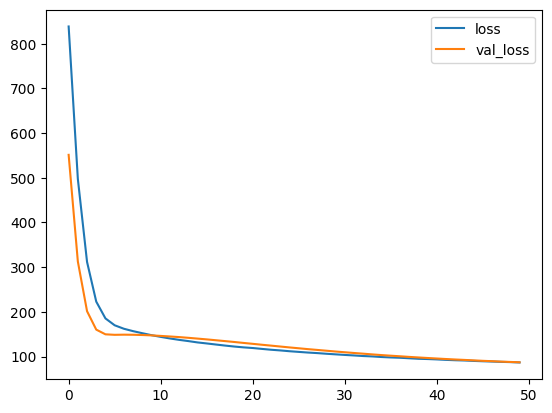

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [9]:
import pickle

with open("tl_sex_to_age.pkl", "wb") as f:
    pickle.dump(history.history, f)    